<a href="https://colab.research.google.com/github/Gustavo2022Palomeque/Desaf-o/blob/main/Desaf%C3%ADo_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print('Archivo subido:', fn)
    df = pd.read_csv(io.BytesIO(uploaded[fn]))


Saving datos_tratados.csv to datos_tratados (2).csv
Archivo subido: datos_tratados (2).csv


In [ ]:
df.head()


,Churn,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,phone.MultipleLines_Yes,...,account.Charges.Total_995.35,account.Charges.Total_996.45,account.Charges.Total_996.85,account.Charges.Total_996.95,account.Charges.Total_997.65,account.Charges.Total_997.75,account.Charges.Total_998.1,account.Charges.Total_999.45,account.Charges.Total_999.8,account.Charges.Total_999.9
0,0,0,9,65.6,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,0,9,59.9,True,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,1,0,4,73.9,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,1,13,98.0,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,1,3,83.9,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Información de columnas, tipos de datos y valores no nulos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 6560 entries, Churn to account.Charges.Total_999.9
dtypes: bool(6556), float64(1), int64(3)
memory usage: 44.2 MB


In [ ]:
# Verificar valores nulos y mostrar estadísticas básicas
print("Valores nulos por columna:")
print(df.isnull().sum())

print("\nResumen estadístico:")
print(df.describe())


Valores nulos por columna:
Churn                           0
customer.SeniorCitizen          0
customer.tenure                 0
account.Charges.Monthly         0
customer.gender_Male            0
                               ..
account.Charges.Total_997.75    0
account.Charges.Total_998.1     0
account.Charges.Total_999.45    0
account.Charges.Total_999.8     0
account.Charges.Total_999.9     0
Length: 6560, dtype: int64

Resumen estadístico:
             Churn  customer.SeniorCitizen  customer.tenure  \
count  7043.000000             7043.000000      7043.000000   
mean      0.265370                0.162147        32.371149   
std       0.441561                0.368612        24.559481   
min       0.000000                0.000000         0.000000   
25%       0.000000                0.000000         9.000000   
50%       0.000000                0.000000        29.000000   
75%       1.000000                0.000000        55.000000   
max       1.000000                1.000000    

In [ ]:
df.columns.tolist()


['Churn',
 'customer.SeniorCitizen',
 'customer.tenure',
 'account.Charges.Monthly',
 'customer.gender_Male',
 'customer.Partner_Yes',
 'customer.Dependents_Yes',
 'phone.PhoneService_Yes',
 'phone.MultipleLines_No phone service',
 'phone.MultipleLines_Yes',
 'internet.InternetService_Fiber optic',
 'internet.InternetService_No',
 'internet.OnlineSecurity_No internet service',
 'internet.OnlineSecurity_Yes',
 'internet.OnlineBackup_No internet service',
 'internet.OnlineBackup_Yes',
 'internet.DeviceProtection_No internet service',
 'internet.DeviceProtection_Yes',
 'internet.TechSupport_No internet service',
 'internet.TechSupport_Yes',
 'internet.StreamingTV_No internet service',
 'internet.StreamingTV_Yes',
 'internet.StreamingMovies_No internet service',
 'internet.StreamingMovies_Yes',
 'account.Contract_One year',
 'account.Contract_Two year',
 'account.PaperlessBilling_Yes',
 'account.PaymentMethod_Credit card (automatic)',
 'account.PaymentMethod_Electronic check',
 'account.Pa

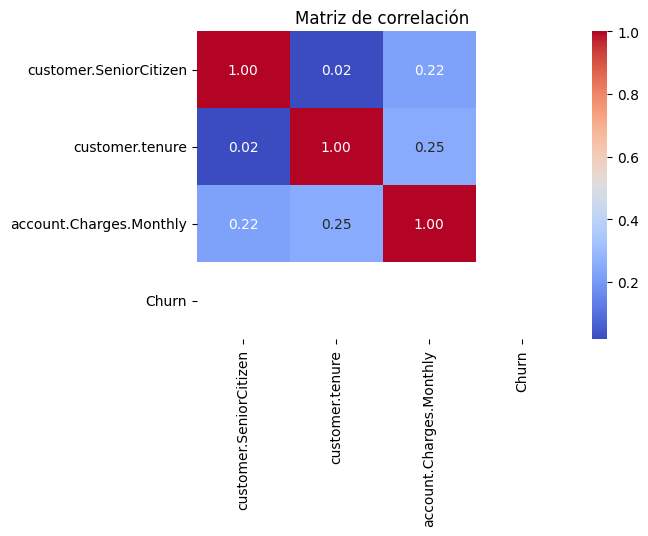

In [16]:
# Celda 5: Matriz de correlación con variables numéricas disponibles

import matplotlib.pyplot as plt
import seaborn as sns

# Columnas numéricas y variable objetivo que existen en el dataframe
columnas_interes = ['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly', 'Churn']

# Calculamos matriz de correlación
corr = df[columnas_interes].corr()

# Graficamos heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()


In [18]:
X = df.drop("Churn", axis=1)
y = df["Churn"]


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
print("Columnas del dataframe:")
print(df.columns)

print("\nPrimeros 10 valores de y:")
print(y.head(10))

print("\nTipos de datos de y:")
print(y.dtype)

print("\nValores únicos en y:")
print(y.unique())

print("\nCantidad total de filas en df:")
print(len(df))


Columnas del dataframe:
Index(['Churn', 'customer.SeniorCitizen', 'customer.tenure',
       'account.Charges.Monthly', 'customer.gender_Male',
       'customer.Partner_Yes', 'customer.Dependents_Yes',
       'phone.PhoneService_Yes', 'phone.MultipleLines_No phone service',
       'phone.MultipleLines_Yes',
       ...
       'account.Charges.Total_995.35', 'account.Charges.Total_996.45',
       'account.Charges.Total_996.85', 'account.Charges.Total_996.95',
       'account.Charges.Total_997.65', 'account.Charges.Total_997.75',
       'account.Charges.Total_998.1', 'account.Charges.Total_999.45',
       'account.Charges.Total_999.8', 'account.Charges.Total_999.9'],
      dtype='object', length=6560)

Primeros 10 valores de y:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: Churn, dtype: float64

Tipos de datos de y:
float64

Valores únicos en y:
[nan]

Cantidad total de filas en df:
7043


In [24]:
# Diagnóstico de la variable objetivo y

print("Columnas del dataframe:")
print(df.columns)

print("\nPrimeros 10 valores de y:")
print(y.head(10))

print("\nTipos de datos de y:")
print(y.dtype)

print("\nValores únicos en y:")
print(y.unique())

print("\nCantidad total de filas en df:")
print(len(df))

print("\nCantidad de valores nulos en y:")
print(y.isna().sum())

# Mostrar filas donde y es NaN para investigar más a fondo
print("\nFilas donde y (Churn) es NaN:")
print(df[y.isna()])


Columnas del dataframe:
Index(['Churn', 'customer.SeniorCitizen', 'customer.tenure',
       'account.Charges.Monthly', 'customer.gender_Male',
       'customer.Partner_Yes', 'customer.Dependents_Yes',
       'phone.PhoneService_Yes', 'phone.MultipleLines_No phone service',
       'phone.MultipleLines_Yes',
       ...
       'account.Charges.Total_995.35', 'account.Charges.Total_996.45',
       'account.Charges.Total_996.85', 'account.Charges.Total_996.95',
       'account.Charges.Total_997.65', 'account.Charges.Total_997.75',
       'account.Charges.Total_998.1', 'account.Charges.Total_999.45',
       'account.Charges.Total_999.8', 'account.Charges.Total_999.9'],
      dtype='object', length=6560)

Primeros 10 valores de y:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: Churn, dtype: float64

Tipos de datos de y:
float64

Valores únicos en y:
[nan]

Cantidad total de filas en df:
7043

Cantidad de valores nulos en y:
7043

Filas donde y (Churn) es

In [27]:
from google.colab import files
import pandas as pd

# Paso 1: subir el archivo desde tu PC
uploaded = files.upload()

# Paso 2: cargar el archivo recién subido (ajustar nombre si es distinto)
nombre_archivo = list(uploaded.keys())[0]
print(f"Cargando archivo: {nombre_archivo}")

df_original = pd.read_csv(nombre_archivo)

# Confirmar que se cargó bien
print("Columnas del DataFrame original:")
print(df_original.columns)

print("\nValores únicos en 'Churn' del archivo original:")
print(df_original['Churn'].unique())


Saving datos_tratados.csv to datos_tratados (3).csv
Cargando archivo: datos_tratados (3).csv
Columnas del DataFrame original:
Index(['Churn', 'customer.SeniorCitizen', 'customer.tenure',
       'account.Charges.Monthly', 'customer.gender_Male',
       'customer.Partner_Yes', 'customer.Dependents_Yes',
       'phone.PhoneService_Yes', 'phone.MultipleLines_No phone service',
       'phone.MultipleLines_Yes',
       ...
       'account.Charges.Total_995.35', 'account.Charges.Total_996.45',
       'account.Charges.Total_996.85', 'account.Charges.Total_996.95',
       'account.Charges.Total_997.65', 'account.Charges.Total_997.75',
       'account.Charges.Total_998.1', 'account.Charges.Total_999.45',
       'account.Charges.Total_999.8', 'account.Charges.Total_999.9'],
      dtype='object', length=6560)

Valores únicos en 'Churn' del archivo original:
[0 1]


In [28]:
import pandas as pd

# Cargamos el archivo correcto
df = pd.read_csv('/content/datos_tratados (3).csv')

# Verificamos nuevamente la columna objetivo
print("Valores únicos en 'Churn':", df['Churn'].unique())
print("Cantidad de valores nulos en 'Churn':", df['Churn'].isnull().sum())


Valores únicos en 'Churn': [0 1]
Cantidad de valores nulos en 'Churn': 0


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Usar el DataFrame limpio que ya cargaste como df_original
df = df_original.copy()

# Separar X e y
X = df.drop('Churn', axis=1)
y = df['Churn']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Evaluación
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

print("\nPrecisión del modelo:")
print(accuracy_score(y_test, y_pred))


Matriz de Confusión:
[[896 140]
 [188 185]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1036
           1       0.57      0.50      0.53       373

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409


Precisión del modelo:
0.7672107877927609


In [31]:
from sklearn.tree import DecisionTreeClassifier

# Entrenar modelo
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = modelo.predict(X_test)

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

print("\nPrecisión del modelo:")
print(accuracy_score(y_test, y_pred))


Matriz de Confusión:
[[896 140]
 [188 185]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1036
           1       0.57      0.50      0.53       373

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409


Precisión del modelo:
0.7672107877927609


In [33]:
from google.colab import files

df["predicciones"] = modelo.predict(X)
df.to_csv("predicciones.csv", index=False)
files.download("predicciones.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>